# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA24 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA24issues.json

In [1]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA24issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,issue_title,issue_body,created_at,closed_at,labels,State,Author
0,675,Bug: React.useEffect Executes Twice in Strict ...,Description\nWhen running a React application ...,2024-10-31,2024-10-31,"[Category:Bug, DetectionPhase:Testing, Priorit...",closed,SFA24SCM37MA
1,673,Memory Leak Detected in D3.js Force Simulation,There appears to be a memory leak in the force...,2024-10-31,None,"[Category:Inquiry, DetectionPhase:Field, Origi...",open,KFA24SCM30G
2,670,D3.js v7.0 Axis Tick Overlap in Responsive Lay...,"In the latest version of D3.js (v7.0), the axi...",2024-10-31,2024-10-31,"[Category:Bug, DetectionPhase:Design, Priority...",closed,KFA24SCM30G
3,667,Add Example for Using GPT with Custom Retrieva...,"Currently, the OpenAI Cookbook lacks a clear e...",2024-10-31,2024-10-31,"[Category:Bug, Priority:Medium, Status:Approve...",closed,SFA24SCM37MA
4,666,"""Add Example for Fine-Tuning GPT-4 with Custom...","""### Description\n\nIt would be helpful to hav...",2024-10-31,2024-10-31,"[Category:Inquiry, DetectionPhase:Field, Origi...",closed,VFA24SCM43H
...,...,...,...,...,...,...,...,...
293,12,react,No Body for the Issue,2024-09-26,2024-09-27,"[Category:Bug, DetectionPhase:Field, Originati...",closed,SPM587FA24
294,4,TestIssue_04,No Body for the Issue,2024-08-31,2024-09-26,[],closed,SPM587FA24
295,3,TestIssue_02,No Body for the Issue,2024-08-30,None,[],open,SPM587FA24
296,2,TestIssue_01,No Body for the Issue,2024-08-26,2024-10-23,[],closed,SPM587FA24


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SFA24SCM37MA,closed,2024-10-31,2024-10-31,675,"[Category:Bug, DetectionPhase:Testing, Priorit...",NaN,NaN,NaN,NaN,NaN
1,KFA24SCM30G,open,None,2024-10-31,673,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
2,KFA24SCM30G,closed,2024-10-31,2024-10-31,670,"[Category:Bug, DetectionPhase:Design, Priority...",NaN,NaN,NaN,NaN,NaN
3,SFA24SCM37MA,closed,2024-10-31,2024-10-31,667,"[Category:Bug, Priority:Medium, Status:Approve...",NaN,NaN,NaN,NaN,NaN
4,VFA24SCM43H,closed,2024-10-31,2024-10-31,666,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
293,SPM587FA24,closed,2024-09-27,2024-09-26,12,"[Category:Bug, DetectionPhase:Field, Originati...",NaN,NaN,NaN,NaN,NaN
294,SPM587FA24,closed,2024-09-26,2024-08-31,4,[],NaN,NaN,NaN,NaN,NaN
295,SPM587FA24,open,None,2024-08-30,3,[],NaN,NaN,NaN,NaN,NaN
296,SPM587FA24,closed,2024-10-23,2024-08-26,2,[],NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SFA24SCM37MA,closed,2024-10-31,2024-10-31,675,"[Category:Bug, DetectionPhase:Testing, Priorit...",NaN,Testing,Bug,Critical,Approved
1,KFA24SCM30G,open,None,2024-10-31,673,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,InProgress
2,KFA24SCM30G,closed,2024-10-31,2024-10-31,670,"[Category:Bug, DetectionPhase:Design, Priority...",Requirements,Design,Bug,Medium,Approved
3,SFA24SCM37MA,closed,2024-10-31,2024-10-31,667,"[Category:Bug, Priority:Medium, Status:Approve...",NaN,NaN,Bug,Medium,Approved
4,VFA24SCM43H,closed,2024-10-31,2024-10-31,666,"[Category:Inquiry, DetectionPhase:Field, Origi...",Testing,Field,Inquiry,Medium,pendingReview
...,...,...,...,...,...,...,...,...,...,...,...
293,SPM587FA24,closed,2024-09-27,2024-09-26,12,"[Category:Bug, DetectionPhase:Field, Originati...",Coding,Field,Bug,High,Approved
294,SPM587FA24,closed,2024-09-26,2024-08-31,4,[],NaN,NaN,NaN,NaN,NaN
295,SPM587FA24,open,None,2024-08-30,3,[],NaN,NaN,NaN,NaN,NaN
296,SPM587FA24,closed,2024-10-23,2024-08-26,2,[],NaN,NaN,NaN,NaN,NaN


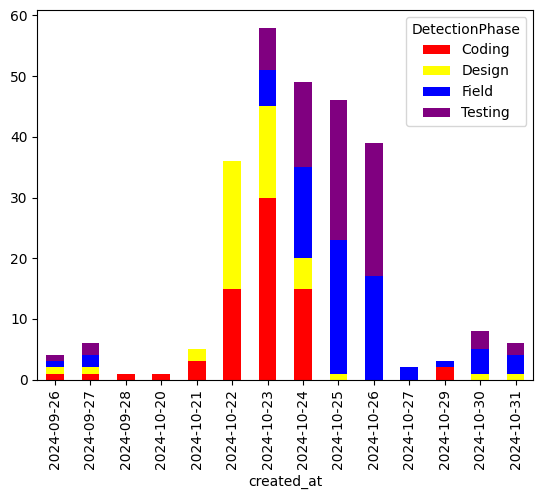

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

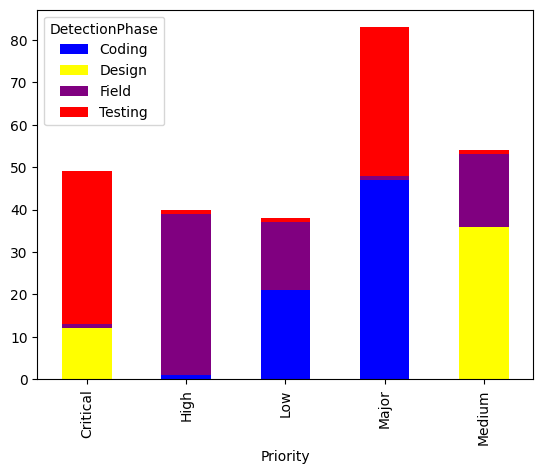

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

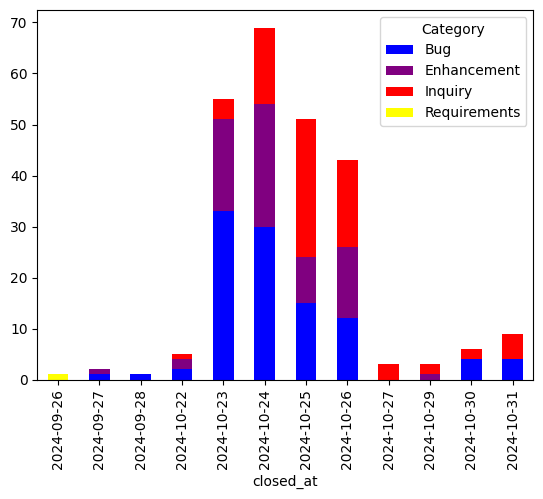

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

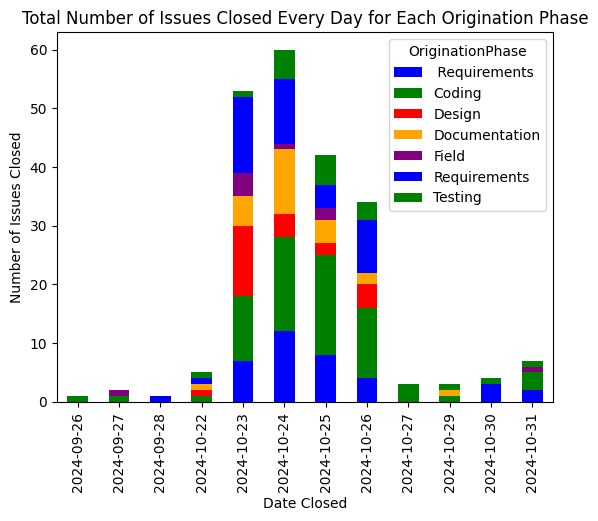

In [12]:
# Requirement #1: Add your code here
# Grouping the issues by 'closed_at' (the date the issue was closed) and 'Origination Phase'
closed_issues_by_phase = wrangled_issues_df.groupby(['closed_at', 'OriginationPhase']).size().unstack()

# Plotting a stacked bar chart for visualizing the closed issues per phase
closed_issues_by_phase.plot(kind='bar', stacked=True, color=['blue', 'green', 'red', 'orange', 'purple'], grid=False)

# Adding title and labels
plt.title('Total Number of Issues Closed Every Day for Each Origination Phase')
plt.xlabel('Date Closed')
plt.ylabel('Number of Issues Closed')
plt.show()



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

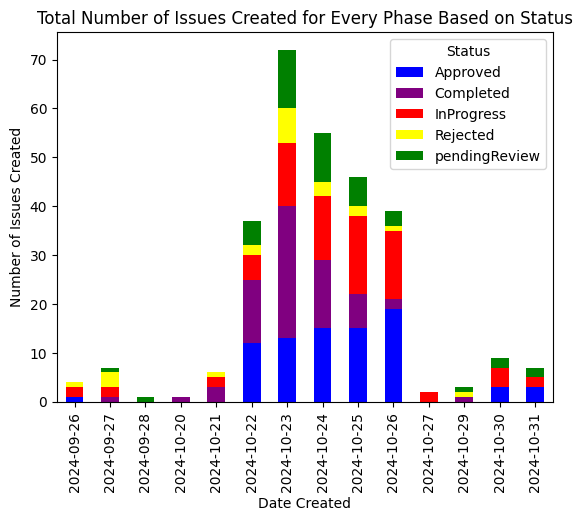

In [13]:
# Requirement #2: Add your code here
# Grouping the issues by 'created_at' (the date the issue was created) and 'Status'
created_issues_by_status = wrangled_issues_df.groupby(['created_at', 'Status']).size().unstack()

# Plotting a stacked bar chart for visualizing the created issues per status
created_issues_by_status.plot(kind='bar', stacked=True, color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

# Adding title and labels
plt.title('Total Number of Issues Created for Every Phase Based on Status')
plt.xlabel('Date Created')
plt.ylabel('Number of Issues Created')
plt.show()

